# Topic: Customer Clustering with RFM 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import squarify
from datetime import datetime

Data understanding

In [ ]:
products = pd.read_csv('Data/Products_with_Categories.csv')
transactions = pd.read_csv('Data/Transactions.csv')

In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   productId    167 non-null    int64  
 1   productName  167 non-null    object 
 2   price        167 non-null    float64
 3   Category     167 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 5.3+ KB


In [ ]:
products.head(5)

,productId,productName,price,Category
0,1,tropical fruit,7.8,Fresh Food
1,2,whole milk,1.8,Dairy
2,3,pip fruit,3.0,Fresh Food
3,4,other vegetables,0.8,Fresh Food
4,5,rolls/buns,1.2,Bakery & Sweets


In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Member_number  38765 non-null  int64 
 1   Date           38765 non-null  object
 2   productId      38765 non-null  int64 
 3   items          38765 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.2+ MB


In [ ]:
transactions.head(5)

,Member_number,Date,productId,items
0,1808,21-07-2015,1,3
1,2552,05-01-2015,2,1
2,2300,19-09-2015,3,3
3,1187,12-12-2015,4,3
4,3037,01-02-2015,2,1


Data Pre-processing

In [ ]:
string_to_date = lambda x : datetime.strptime(x, "%d-%m-%Y").date()
transactions['Date'] = transactions['Date'].apply(string_to_date)
transactions['Date'] = transactions['Date'].astype('datetime64[ns]')

In [ ]:
transactions.isnull().sum()

Member_number    0
Date             0
productId        0
items            0
dtype: int64

In [ ]:
products.isnull().sum()

productId      0
productName    0
price          0
Category       0
dtype: int64

In [ ]:
transactions.isna().sum()

Member_number    0
Date             0
productId        0
items            0
dtype: int64

In [ ]:
products.isna().sum()

productId      0
productName    0
price          0
Category       0
dtype: int64

In [ ]:
df = transactions.merge(products, on='productId', how='left')

In [ ]:
df.head(5)

,Member_number,Date,productId,items,productName,price,Category
0,1808,2015-07-21,1,3,tropical fruit,7.8,Fresh Food
1,2552,2015-01-05,2,1,whole milk,1.8,Dairy
2,2300,2015-09-19,3,3,pip fruit,3.0,Fresh Food
3,1187,2015-12-12,4,3,other vegetables,0.8,Fresh Food
4,3037,2015-02-01,2,1,whole milk,1.8,Dairy


In [ ]:
df['total_sales'] = df['items'] * df['price']

In [ ]:
df['transaction_id'] = range(1,len(df)+1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38765 entries, 0 to 38764
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Member_number   38765 non-null  int64         
 1   Date            38765 non-null  datetime64[ns]
 2   productId       38765 non-null  int64         
 3   items           38765 non-null  int64         
 4   productName     38765 non-null  object        
 5   price           38765 non-null  float64       
 6   Category        38765 non-null  object        
 7   total_sales     38765 non-null  float64       
 8   transaction_id  38765 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 3.0+ MB


In [ ]:
print('{:,} unique member_number'.format(transactions['Member_number'].nunique()))
print('Transactions timeframe from {} to {}'.format(transactions['Date'].min(), transactions['Date'].max()))

3,898 unique member_number
Transactions timeframe from 2014-01-01 00:00:00 to 2015-12-30 00:00:00


In [ ]:
df.where(df['price']<0).any()

Member_number     False
Date              False
productId         False
items             False
productName       False
price             False
Category          False
total_sales       False
transaction_id    False
dtype: bool

In [ ]:
df.where(df['items']<=0).any()

Member_number     False
Date              False
productId         False
items             False
productName       False
price             False
Category          False
total_sales       False
transaction_id    False
dtype: bool

RFM

In [ ]:
max_date = df['Date'].max().date()

Recency = Recency = lambda x : (max_date - x.max().date()).days
Frequency  = lambda x: len(x.unique())
Monetary = lambda x: sum(x)

df_RFM = df.groupby('Member_number').agg({'Date':Recency,
                                          'transaction_id': Frequency,
                                          'total_sales':Monetary})


In [ ]:
df_RFM.head()

,Date,transaction_id,total_sales
Member_number,,,
1000,35,13,53.80
1001,242,12,100.00
1002,122,8,70.30
1003,323,8,60.65
1004,28,21,204.96


In [ ]:
df_RFM.columns = ['Recency', 'Frequency', 'Monetary']

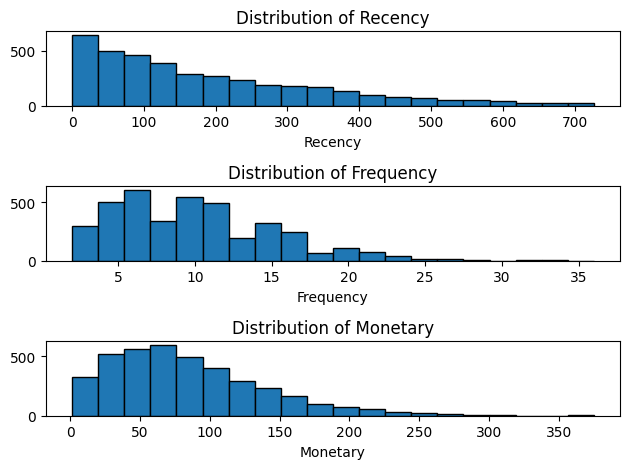

In [ ]:
# Vẽ phân phối của 'Recency'
plt.subplot(3, 1, 1) # 3 hàng, 1 cột, vị trí thứ nhất
plt.hist(df_RFM['Recency'], bins=20, edgecolor='black') # Chọn số lượng bins phù hợp
plt.title('Distribution of Recency')
plt.xlabel('Recency')

# Vẽ phân phối của 'Frequency'
plt.subplot(3, 1, 2) # 3 hàng, 1 cột, vị trí thứ hai
plt.hist(df_RFM['Frequency'], bins=20, edgecolor='black') # Chọn số lượng bins phù hợp
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')

# Vẽ phân phối của 'Monetary'
plt.subplot(3, 1, 3) # 3 hàng, 1 cột, vị trí thứ ba
plt.hist(df_RFM['Monetary'], bins=20, edgecolor='black') # Chọn số lượng bins phù hợp
plt.title('Distribution of Monetary')
plt.xlabel('Monetary')

plt.tight_layout()
plt.show()

Cả 3 Recency, Frequency and Monetary đều right skew và không phải normal distribution --> Log transfomation để giảm skewness

In [ ]:
df_log_transformed = df_RFM.apply(lambda x: np.log1p(x) if x.name in ['Recency', 'Frequency', 'Monetary'] else x)

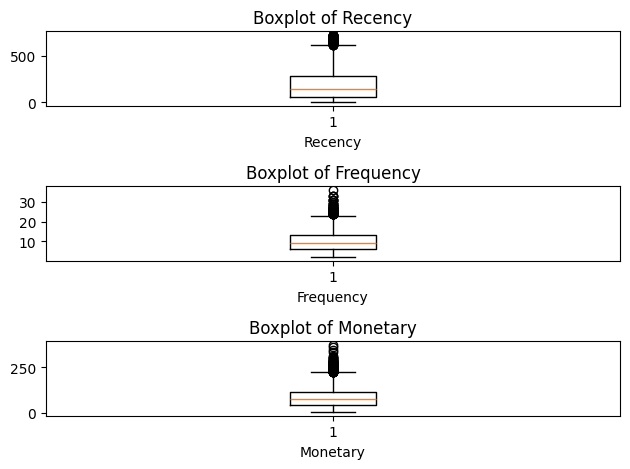

In [ ]:
# Vẽ phân phối của 'Recency'
plt.subplot(3, 1, 1) # 3 hàng, 1 cột, vị trí thứ nhất
plt.boxplot(df_RFM['Recency']) # Chọn số lượng bins phù hợp
plt.title('Boxplot of Recency')
plt.xlabel('Recency')

# Vẽ phân phối của 'Frequency'
plt.subplot(3, 1, 2) # 3 hàng, 1 cột, vị trí thứ hai
plt.boxplot(df_RFM['Frequency']) # Chọn số lượng bins phù hợp
plt.title('Boxplot of Frequency')
plt.xlabel('Frequency')

# Vẽ phân phối của 'Monetary'
plt.subplot(3, 1, 3) # 3 hàng, 1 cột, vị trí thứ ba
plt.boxplot(df_RFM['Monetary']) # Chọn số lượng bins phù hợp
plt.title('Boxplot of Monetary')
plt.xlabel('Monetary')

plt.tight_layout()
plt.show()

Cả 3 Recency, Frequency and Monetary đều có nhiều upper outliers --> Robust Scaler để giảm ảnh hưởng của outliers

In [ ]:
from sklearn.preprocessing import RobustScaler
robust = RobustScaler()
df_scaled = pd.DataFrame(robust.fit_transform(df_log_transformed[['Recency', 'Frequency', 'Monetary']]), 
                         columns=['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled'], 
                         index=df_RFM.index)

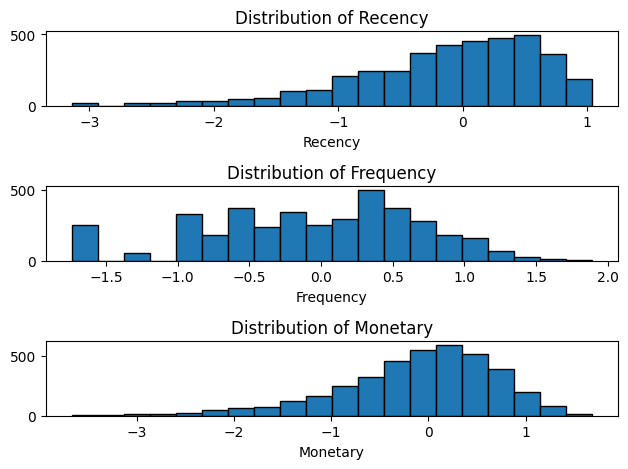

In [ ]:
# Vẽ phân phối của 'Recency'
plt.subplot(3, 1, 1) # 3 hàng, 1 cột, vị trí thứ nhất
plt.hist(df_scaled['Recency_scaled'], bins=20, edgecolor='black') # Chọn số lượng bins phù hợp
plt.title('Distribution of Recency')
plt.xlabel('Recency')

# Vẽ phân phối của 'Frequency'
plt.subplot(3, 1, 2) # 3 hàng, 1 cột, vị trí thứ hai
plt.hist(df_scaled['Frequency_scaled'], bins=20, edgecolor='black') # Chọn số lượng bins phù hợp
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')

# Vẽ phân phối của 'Monetary'
plt.subplot(3, 1, 3) # 3 hàng, 1 cột, vị trí thứ ba
plt.hist(df_scaled['Monetary_scaled'], bins=20, edgecolor='black') # Chọn số lượng bins phù hợp
plt.title('Distribution of Monetary')
plt.xlabel('Monetary')

plt.tight_layout()
plt.show()

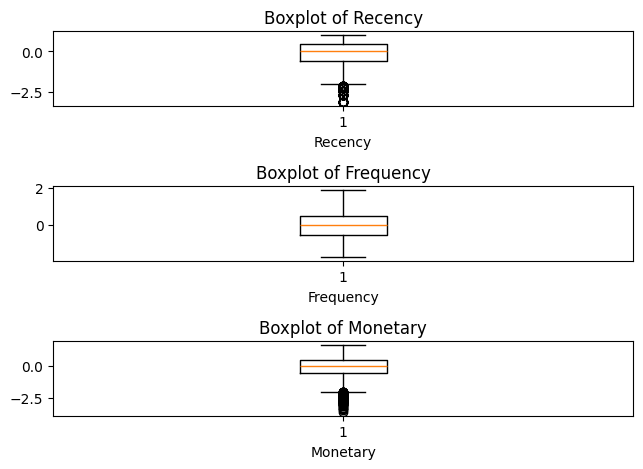

In [ ]:
# Vẽ phân phối của 'Recency'
plt.subplot(3, 1, 1) # 3 hàng, 1 cột, vị trí thứ nhất
plt.boxplot(df_scaled['Recency_scaled']) # Chọn số lượng bins phù hợp
plt.title('Boxplot of Recency')
plt.xlabel('Recency')

# Vẽ phân phối của 'Frequency'
plt.subplot(3, 1, 2) # 3 hàng, 1 cột, vị trí thứ hai
plt.boxplot(df_scaled['Frequency_scaled']) # Chọn số lượng bins phù hợp
plt.title('Boxplot of Frequency')
plt.xlabel('Frequency')

# Vẽ phân phối của 'Monetary'
plt.subplot(3, 1, 3) # 3 hàng, 1 cột, vị trí thứ ba
plt.boxplot(df_scaled['Monetary_scaled']) # Chọn số lượng bins phù hợp
plt.title('Boxplot of Monetary')
plt.xlabel('Monetary')

plt.tight_layout()
plt.show()

In [ ]:
df_scaled.head()

,Recency_scaled,Frequency_scaled,Monetary_scaled
Member_number,,,
1000,-0.869699,0.485427,-0.341540
1001,0.340472,0.378512,0.299574
1002,-0.091033,-0.152003,-0.065556
1003,0.522790,-0.152003,-0.218039
1004,-1.006730,1.137504,1.046730


## GMM

In [ ]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

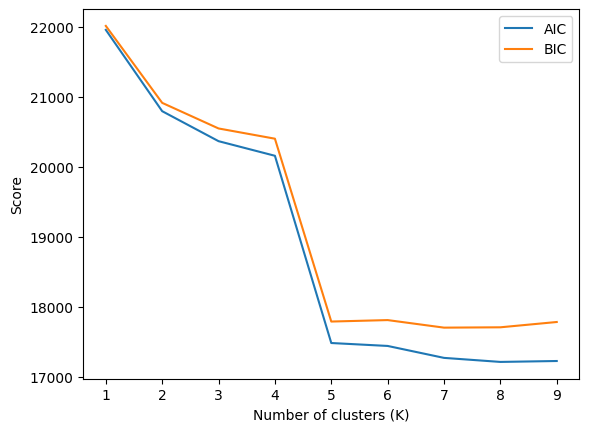

In [ ]:
aics, bics = [], []
k_range = range(1, 10)

for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(df_scaled)
    aics.append(gmm.aic(df_scaled))
    bics.append(gmm.bic(df_scaled))

plt.plot(k_range, aics, label="AIC")
plt.plot(k_range, bics, label="BIC")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Score")
plt.legend()
plt.show()

In [ ]:
gmm = GaussianMixture(n_components=5)
gmm.fit(df_scaled)

GaussianMixture(n_components=5)

In [ ]:
print(gmm.weights_)

[0.23789818 0.30889117 0.06096553 0.22788665 0.16435847]


In [ ]:
print(gmm.means_)

[[ 0.41103198 -0.62280364 -0.61338684]
 [ 0.12300319  0.20498298  0.11164172]
 [ 0.53230218 -1.73696559 -1.76429159]
 [-0.56743568  0.65167709  0.54231167]
 [-1.06916426 -0.05907539 -0.1645285 ]]


In [ ]:
print(gmm.covariances_)

[[[ 1.21850217e-01 -2.11100300e-02 -3.44052619e-02]
  [-2.11100300e-02  1.35143167e-01  1.01827874e-01]
  [-3.44052619e-02  1.01827874e-01  3.69279965e-01]]

 [[ 1.35940462e-01 -7.52437375e-03  3.34413027e-03]
  [-7.52437375e-03  1.51012497e-01  1.10427963e-01]
  [ 3.34413027e-03  1.10427963e-01  2.00393203e-01]]

 [[ 2.00589964e-01 -3.48548738e-31  1.03859002e-02]
  [-3.43569471e-31  1.00000000e-06  1.10207792e-30]
  [ 1.03859002e-02  1.10207792e-30  5.49722003e-01]]

 [[ 2.74578429e-01  2.00883458e-02  2.62699879e-02]
  [ 2.00883458e-02  1.67071474e-01  1.23069672e-01]
  [ 2.62699879e-02  1.23069672e-01  1.66172217e-01]]

 [[ 7.73528615e-01 -1.47236626e-01 -1.40497939e-01]
  [-1.47236626e-01  4.29039427e-01  3.92216890e-01]
  [-1.40497939e-01  3.92216890e-01  5.76139200e-01]]]


In [ ]:
types = gmm.predict(df_scaled)

In [ ]:
print(types)

[4 1 1 ... 2 4 0]


In [ ]:
df_scaled['Group'] = types

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, 'Customer Segmentation GMM')

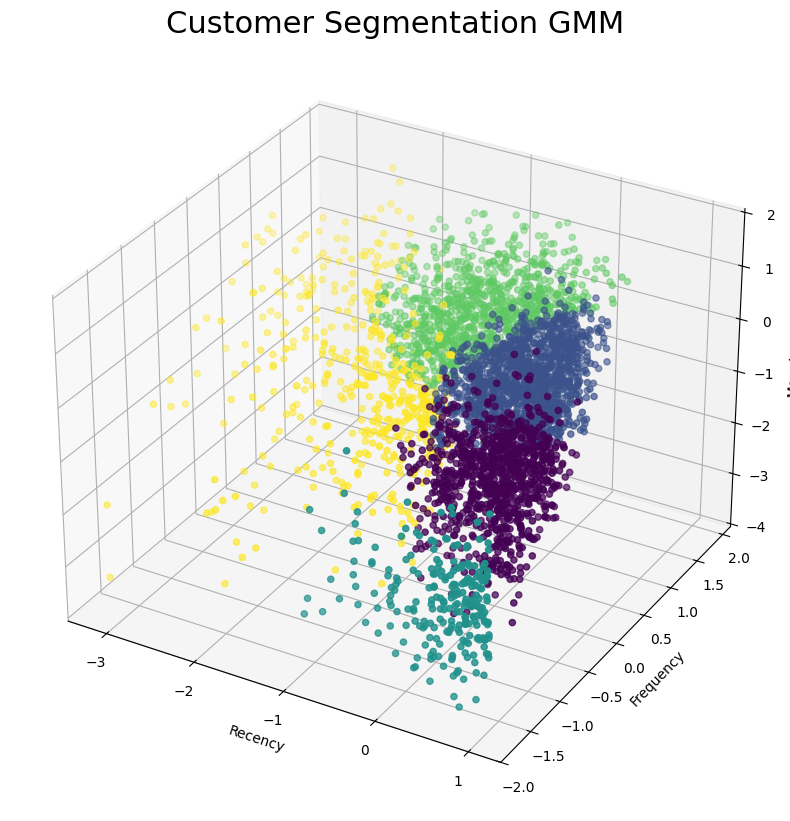

In [ ]:
fig = plt.figure(figsize=(10,10))
ax= fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(df_scaled.Recency_scaled, df_scaled.Frequency_scaled, df_scaled.Monetary_scaled, c=df_scaled.Group, cmap='viridis')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title("Customer Segmentation GMM", fontsize=22) 

In [ ]:
# Calculate average values for each RFM_Level, and return a size of each segment
rfm_agg = df_scaled.groupby('Group').agg({
    'Recency_scaled': 'mean',
    'Frequency_scaled': 'mean',
    'Monetary_scaled': ['mean', 'count']}).round(0)

rfm_agg.columns = rfm_agg.columns.droplevel()
rfm_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg['Percent'] = round((rfm_agg['Count']/rfm_agg.Count.sum())*100, 2)

# Reset the index
rfm_agg = rfm_agg.reset_index()

In [ ]:
rfm_agg

,Group,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent
0,0,0.0,-1.0,-1.0,948,24.32
1,1,0.0,0.0,0.0,1325,33.99
2,2,1.0,-2.0,-2.0,237,6.08
3,3,-1.0,1.0,1.0,888,22.78
4,4,-1.0,-0.0,-0.0,500,12.83


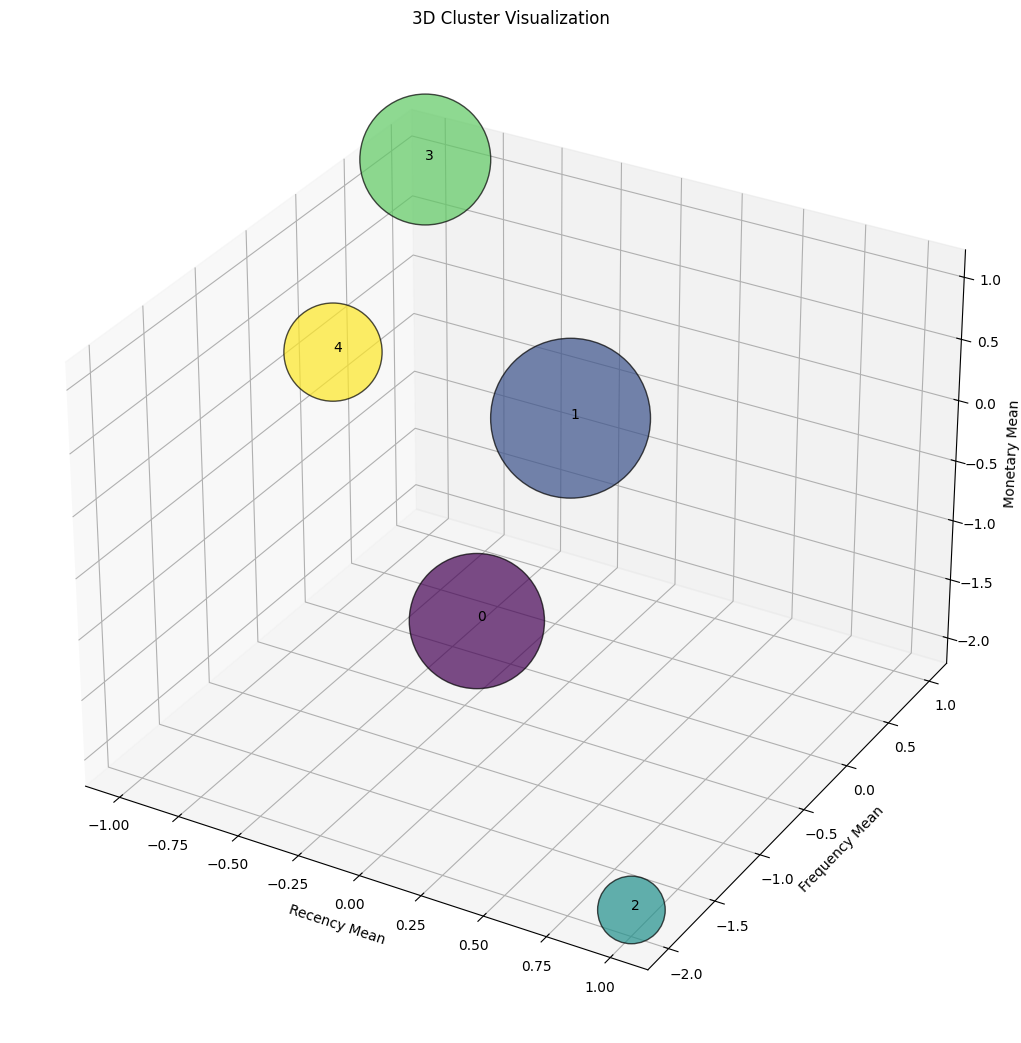

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Chuẩn bị dữ liệu
x = rfm_agg['RecencyMean']
y = rfm_agg['FrequencyMean']
z = rfm_agg['MonetaryMean']
size = rfm_agg['Count'] * 10  # Điều chỉnh kích thước theo số lượng khách hàng

# Chuyển đổi cụm về số để dùng làm màu
clusters = rfm_agg['Group'].astype('category').cat.codes

# Tạo figure 3D
fig = plt.figure(figsize=(15, 13))
ax = fig.add_subplot(111, projection='3d')

# Vẽ scatter plot 3D
scatter = ax.scatter(x, y, z, c=clusters, cmap='viridis', s=size, alpha=0.7, edgecolors='black')

# Gán nhãn trục
ax.set_xlabel("Recency Mean")
ax.set_ylabel("Frequency Mean")
ax.set_zlabel("Monetary Mean")
ax.set_title("3D Cluster Visualization")

# Hiển thị tên cụm tại mỗi điểm
for i, label in enumerate(rfm_agg['Group']):
    ax.text(x[i], y[i], z[i], label, fontsize=10, color='black')

# Hiển thị biểu đồ
plt.show()
